# Experiement: Round Three | 1%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_1.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  30046  23540       1     159    76.0    140     80            3     1   
1  21181  19990       2     150    61.0    130     80            3     3   
2  93860  23438       2     175    70.0    150     90            1     1   
3  76954  19659       1     155    78.0    120     80            1     2   
4  65476  17368       2     173   109.0    150    100            1     1   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       1       1  
2      1     1       0       1  
3      0     1       1       1  
4      0     0       1       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35039 entries, 0 to 35038
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           35039 non-null  int64  
 1   age          35039 non-null  int64  
 2   gender       35039 non-null  int64  
 3   height       35039 non-null  int64  
 4   weight       35039 non-null  float64
 5   ap_hi        35039 non-null  int64  
 6   ap_lo        35039 non-null  int64  
 7   cholesterol  35039 non-null  int64  
 8   gluc         35039 non-null  int64  
 9   smoke        35039 non-null  int64  
 10  alco         35039 non-null  int64  
 11  active       35039 non-null  int64  
 12  cardio       35039 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 3.5 MB


0    34679
1      360
Name: cardio, dtype: int64

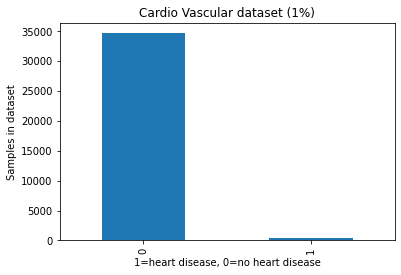

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (1%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

Balance ratio: 360/35039 = 0,0102743

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
24328  69319  15985       1     168    62.0    120     80            1     1   
21437  61145  19070       1     155    92.0    140     90            2     1   
22190  63264  18094       1     154    73.0    110     70            1     1   
19560  55685  18975       1     164    52.0    120     80            1     1   
8103   22848  15971       2     162    80.0    120     80            1     1   

       smoke  alco  active  
24328      0     0       1  
21437      0     0       0  
22190      0     0       1  
19560      0     0       0  
8103       0     0       1

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27743
           1       0.00      0.00      0.00       288

    accuracy                           0.99     28031
   macro avg       0.49      0.50      0.50     28031
weighted avg       0.98      0.99      0.98     28031



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6936
           1       0.17      0.01      0.03        72

    accuracy                           0.99      7008
   macro avg       0.58      0.51      0.51      7008
weighted avg       0.98      0.99      0.98      7008



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.659


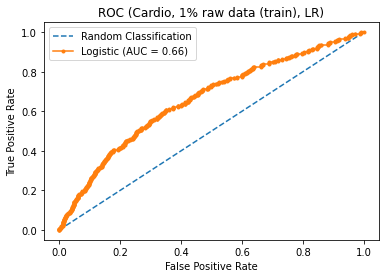

In [8]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.614


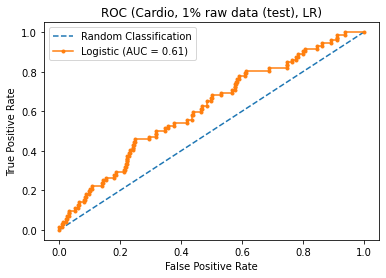

In [9]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27743
           1       1.00      0.00      0.01       288

    accuracy                           0.99     28031
   macro avg       0.99      0.50      0.50     28031
weighted avg       0.99      0.99      0.98     28031



In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6936
           1       0.00      0.00      0.00        72

    accuracy                           0.99      7008
   macro avg       0.49      0.50      0.50      7008
weighted avg       0.98      0.99      0.98      7008



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.120


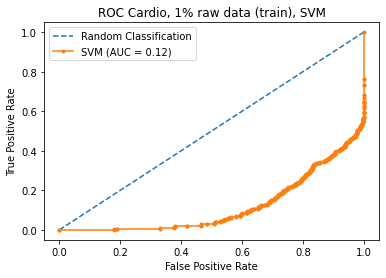

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.503


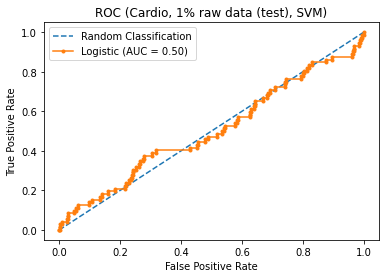

In [13]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [14]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [15]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.01024	validation_0-logloss:0.60183	validation_1-error:0.01042	validation_1-logloss:0.60195
[1]	validation_0-error:0.01024	validation_0-logloss:0.52719	validation_1-error:0.01042	validation_1-logloss:0.52729
[2]	validation_0-error:0.01020	validation_0-logloss:0.46504	validation_1-error:0.01042	validation_1-logloss:0.46516
[3]	validation_0-error:0.01027	validation_0-logloss:0.41260	validation_1-error:0.01027	validation_1-logloss:0.41274
[4]	validation_0-error:0.01027	validation_0-logloss:0.36784	validation_1-error:0.01027	validation_1-logloss:0.36803
[5]	validation_0-error:0.01027	validation_0-logloss:0.32942	validation_1-error:0.01027	validation_1-logloss:0.32965
[6]	validation_0-error:0.01027	validation_0-logloss:0.29619	validation_1-error:0.01027	validation_1-logloss:0.29645
[7]	validation_0-error:0.01027	validation_0-logloss:0.26723	validation_1-error:0.01027	validation_1-logloss:0.26756
[8]	validation_0-error:0.01027	validation_0-logloss:0.24194	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27743
           1       0.00      0.00      0.00       288

    accuracy                           0.99     28031
   macro avg       0.49      0.50      0.50     28031
weighted avg       0.98      0.99      0.98     28031



In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6936
           1       0.00      0.00      0.00        72

    accuracy                           0.99      7008
   macro avg       0.49      0.50      0.50      7008
weighted avg       0.98      0.99      0.98      7008



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.855


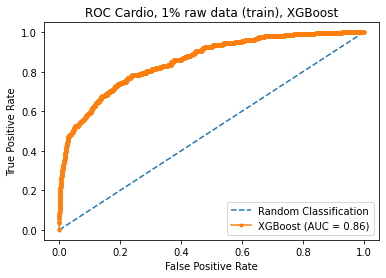

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.761


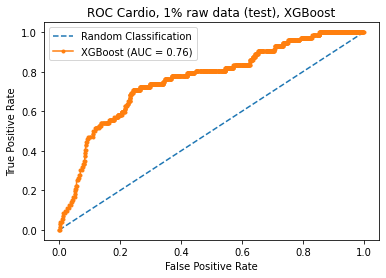

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [20]:
df_train = X_train
df_train['cardio'] = y_train

In [21]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
24328  69319  15985       1     168    62.0    120     80            1     1   
21437  61145  19070       1     155    92.0    140     90            2     1   
22190  63264  18094       1     154    73.0    110     70            1     1   
19560  55685  18975       1     164    52.0    120     80            1     1   
8103   22848  15971       2     162    80.0    120     80            1     1   

       smoke  alco  active  cardio  
24328      0     0       1       0  
21437      0     0       0       0  
22190      0     0       1       0  
19560      0     0       0       0  
8103       0     0       1       0


### SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

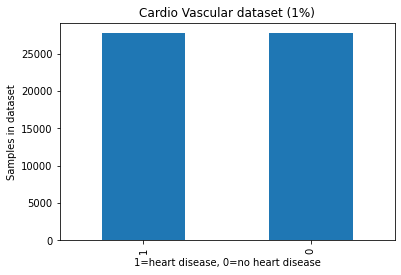

In [22]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (1%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [23]:
X_train = df_oversampler
y_train = df_oversampler_y

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     27743
           1       0.72      0.70      0.71     27743

    accuracy                           0.71     55486
   macro avg       0.71      0.71      0.71     55486
weighted avg       0.71      0.71      0.71     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      6936
           1       0.02      0.58      0.04        72

    accuracy                           0.72      7008
   macro avg       0.51      0.65      0.44      7008
weighted avg       0.98      0.72      0.83      7008



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.777


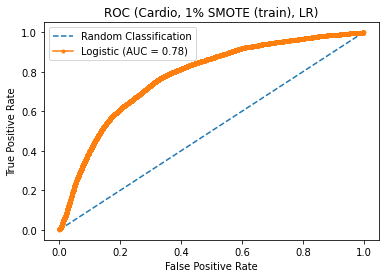

In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.726


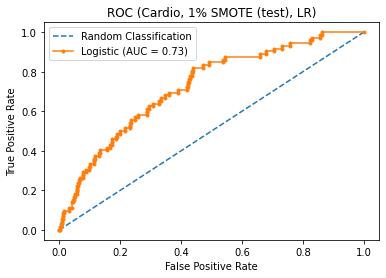

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81     27743
           1       0.79      0.85      0.82     27743

    accuracy                           0.81     55486
   macro avg       0.82      0.81      0.81     55486
weighted avg       0.82      0.81      0.81     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      6936
           1       0.02      0.36      0.03        72

    accuracy                           0.78      7008
   macro avg       0.50      0.57      0.45      7008
weighted avg       0.98      0.78      0.87      7008



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.894


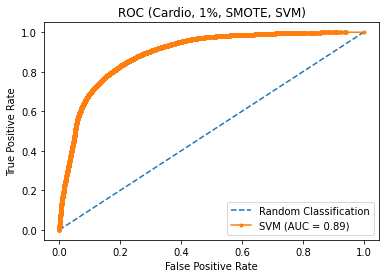

In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.629


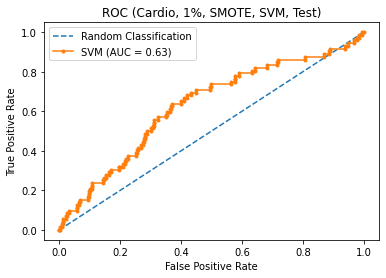

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.19423	validation_0-logloss:0.65337	validation_1-error:0.18565	validation_1-logloss:0.65399
[1]	validation_0-error:0.16258	validation_0-logloss:0.61522	validation_1-error:0.12557	validation_1-logloss:0.61622
[2]	validation_0-error:0.16498	validation_0-logloss:0.58343	validation_1-error:0.11701	validation_1-logloss:0.58474
[3]	validation_0-error:0.16330	validation_0-logloss:0.56034	validation_1-error:0.12657	validation_1-logloss:0.56177
[4]	validation_0-error:0.17610	validation_0-logloss:0.53439	validation_1-error:0.17623	validation_1-logloss:0.53709
[5]	validation_0-error:0.17287	validation_0-logloss:0.51387	validation_1-error:0.17337	validation_1-logloss:0.51642
[6]	validation_0-error:0.16128	validation_0-logloss:0.49624	validation_1-error:0.12657	validation_1-logloss:0.49800
[7]	validation_0-error:0.16168	validation_0-logloss:0.47673	validation_1-error:0.15996	validation_1-logloss:0.48028
[8]	validation_0-error:0.15224	validation_0-logloss:0.46269	validation_1

[71]	validation_0-error:0.08370	validation_0-logloss:0.22940	validation_1-error:0.07163	validation_1-logloss:0.24111
[72]	validation_0-error:0.08346	validation_0-logloss:0.22785	validation_1-error:0.07192	validation_1-logloss:0.23990
[73]	validation_0-error:0.08310	validation_0-logloss:0.22642	validation_1-error:0.07178	validation_1-logloss:0.23853
[74]	validation_0-error:0.08258	validation_0-logloss:0.22533	validation_1-error:0.07178	validation_1-logloss:0.23778
[75]	validation_0-error:0.08253	validation_0-logloss:0.22487	validation_1-error:0.07149	validation_1-logloss:0.23764
[76]	validation_0-error:0.08247	validation_0-logloss:0.22440	validation_1-error:0.07192	validation_1-logloss:0.23735
[77]	validation_0-error:0.08170	validation_0-logloss:0.22263	validation_1-error:0.06978	validation_1-logloss:0.23522
[78]	validation_0-error:0.08121	validation_0-logloss:0.22119	validation_1-error:0.06906	validation_1-logloss:0.23375
[79]	validation_0-error:0.08103	validation_0-logloss:0.22082	val

[141]	validation_0-error:0.05863	validation_0-logloss:0.16778	validation_1-error:0.05337	validation_1-logloss:0.18965
[142]	validation_0-error:0.05825	validation_0-logloss:0.16748	validation_1-error:0.05308	validation_1-logloss:0.18955
[143]	validation_0-error:0.05769	validation_0-logloss:0.16643	validation_1-error:0.05265	validation_1-logloss:0.18860
[144]	validation_0-error:0.05762	validation_0-logloss:0.16628	validation_1-error:0.05265	validation_1-logloss:0.18858
[145]	validation_0-error:0.05681	validation_0-logloss:0.16479	validation_1-error:0.05223	validation_1-logloss:0.18733
[146]	validation_0-error:0.05641	validation_0-logloss:0.16379	validation_1-error:0.05194	validation_1-logloss:0.18655
[147]	validation_0-error:0.05610	validation_0-logloss:0.16348	validation_1-error:0.05223	validation_1-logloss:0.18646
[148]	validation_0-error:0.05527	validation_0-logloss:0.16239	validation_1-error:0.05208	validation_1-logloss:0.18561
[149]	validation_0-error:0.05518	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     27743
           1       0.97      0.95      0.96     27743

    accuracy                           0.96     55486
   macro avg       0.96      0.96      0.96     55486
weighted avg       0.96      0.96      0.96     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6936
           1       0.02      0.07      0.03        72

    accuracy                           0.96      7008
   macro avg       0.51      0.52      0.51      7008
weighted avg       0.98      0.96      0.97      7008



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.994


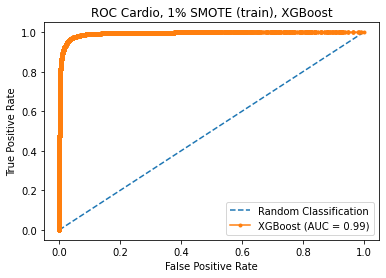

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.659


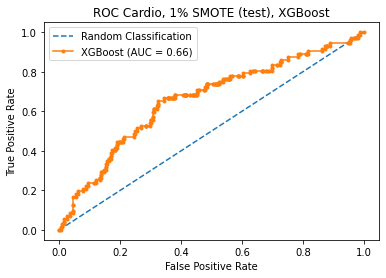

In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1      288
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1      288
Name: cardio, dtype: int64

In [39]:
tvae_result_df_1 = tvae_result_df[tvae_result_df['cardio'] == 1]
tvae_result_df_0 = tvae_result_df[tvae_result_df['cardio'] == 0]
train_df_0_sm = tvae_result_df_0.sample(n = 500)
train_df_sm = train_df_0_sm.append(tvae_result_df_1)
train_df_sm['cardio'].value_counts()

0    500
1    288
Name: cardio, dtype: int64

In [40]:
tvae = TVAE()

tvae.fit(train_df_sm)
samples = tvae.sample(400)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([train_df_sm,samples])
tvae_result_df['cardio'].value_counts()

0    500
1    341
Name: cardio, dtype: int64

In [41]:
tvae = TVAE()

tvae.fit(tvae_result_df)
samples = tvae.sample(500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm1 = pd.concat([tvae_result_df,samples])
tvae_result_df_sm1['cardio'].value_counts()

0    500
1    414
Name: cardio, dtype: int64

In [42]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm1)
samples = tvae.sample(500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm2 = pd.concat([tvae_result_df_sm1,samples])
tvae_result_df_sm2['cardio'].value_counts()

1    558
0    500
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm2)
samples = tvae.sample(600)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm3 = pd.concat([tvae_result_df_sm2,samples])
tvae_result_df_sm3['cardio'].value_counts()

1    707
0    500
Name: cardio, dtype: int64

In [44]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm3)
samples = tvae.sample(1000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm4 = pd.concat([tvae_result_df_sm3,samples])
tvae_result_df_sm4['cardio'].value_counts()

1    1054
0     500
Name: cardio, dtype: int64

In [45]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm4)
samples = tvae.sample(1000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm5 = pd.concat([tvae_result_df_sm4,samples])
tvae_result_df_sm5['cardio'].value_counts()

1    1174
0     500
Name: cardio, dtype: int64

In [46]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm5)
samples = tvae.sample(1000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm6 = pd.concat([tvae_result_df_sm5,samples])
tvae_result_df_sm6['cardio'].value_counts()

1    1670
0     500
Name: cardio, dtype: int64

In [47]:
tvae_result_df_sm_1 = tvae_result_df_sm6[tvae_result_df_sm6['cardio'] == 1]
train_df_0_smed = tvae_result_df_0.sample(n = 2500)
train_df_smed = train_df_0_smed.append(tvae_result_df_sm_1)
train_df_smed['cardio'].value_counts()

0    2500
1    1670
Name: cardio, dtype: int64

In [48]:
tvae = TVAE()

tvae.fit(train_df_smed)
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
train_df_smed0 = pd.concat([train_df_smed,samples])
train_df_smed0['cardio'].value_counts()

0    2500
1    2210
Name: cardio, dtype: int64

In [49]:
tvae = TVAE()

tvae.fit(train_df_smed0)
samples = tvae.sample(2500)
samples = samples[samples['cardio'] ==1.0]
train_df_smed1 = pd.concat([train_df_smed0,samples])
train_df_smed1['cardio'].value_counts()

0    2500
1    2392
Name: cardio, dtype: int64

In [50]:
tvae = TVAE()

tvae.fit(train_df_smed1)
samples = tvae.sample(3000)
samples = samples[samples['cardio'] ==1.0]
train_df_smed2 = pd.concat([train_df_smed1,samples])
train_df_smed2['cardio'].value_counts()

1    2575
0    2500
Name: cardio, dtype: int64

In [51]:
tvae_result_df_smed_1 = train_df_smed2[train_df_smed2['cardio'] == 1]
train_df_0_med = tvae_result_df_0.sample(n = 6000)
train_df_med = train_df_0_med.append(tvae_result_df_smed_1)
train_df_med['cardio'].value_counts()

0    6000
1    2575
Name: cardio, dtype: int64

In [52]:
tvae = TVAE()

tvae.fit(train_df_med)
samples = tvae.sample(5000)
samples = samples[samples['cardio'] ==1.0]
train_df_med0 = pd.concat([train_df_med,samples])
train_df_med0['cardio'].value_counts()

0    6000
1    3893
Name: cardio, dtype: int64

In [53]:
tvae = TVAE()

tvae.fit(train_df_med0)
samples = tvae.sample(5500)
samples = samples[samples['cardio'] ==1.0]
train_df_med1 = pd.concat([train_df_med0,samples])
train_df_med1['cardio'].value_counts()

0    6000
1    3947
Name: cardio, dtype: int64

In [54]:
tvae_result_df_med_1 = train_df_med1[train_df_med1['cardio'] == 1]
train_df_0_med1 = tvae_result_df_0.sample(n = 15000)
train_df_med_1 = train_df_0_med1.append(tvae_result_df_med_1)
train_df_med_1['cardio'].value_counts()

0    15000
1     3947
Name: cardio, dtype: int64

In [55]:
tvae = TVAE()

tvae.fit(train_df_med_1)
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_0 = pd.concat([train_df_med_1,samples])
train_df_med_1_0['cardio'].value_counts()

0    15000
1     7185
Name: cardio, dtype: int64

In [56]:
tvae = TVAE()

tvae.fit(train_df_med_1_0)
samples = tvae.sample(11000)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_1 = pd.concat([train_df_med_1_0,samples])
train_df_med_1_1['cardio'].value_counts()

0    15000
1     9997
Name: cardio, dtype: int64

In [57]:
tvae = TVAE()

tvae.fit(train_df_med_1_1)
samples = tvae.sample(13000)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_2 = pd.concat([train_df_med_1_1,samples])
train_df_med_1_2['cardio'].value_counts()

0    15000
1    13957
Name: cardio, dtype: int64

In [58]:
tvae_result_df_lg = train_df_med_1_2[train_df_med_1_2['cardio'] == 1]
train_df_lg_1 = tvae_result_df_0.append(tvae_result_df_lg)
train_df_lg_1['cardio'].value_counts()

0    27743
1    13957
Name: cardio, dtype: int64

In [59]:
tvae = TVAE()

tvae.fit(train_df_lg_1)
samples = tvae.sample(25000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg_1_1 = pd.concat([train_df_lg_1,samples])
train_df_lg_1_1['cardio'].value_counts()

0    27743
1    26228
Name: cardio, dtype: int64

In [60]:
tvae = TVAE()

tvae.fit(train_df_lg_1_1)
samples = tvae.sample(25000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg_1_2 = pd.concat([train_df_lg_1_1,samples])
train_df_lg_1_2['cardio'].value_counts()

1    34588
0    27743
Name: cardio, dtype: int64

In [61]:
tvae_result_df_1 = train_df_lg_1_2[train_df_lg_1_2['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    34588
Name: cardio, dtype: int64

In [62]:
tvae_result_df_0 = df_train[df_train['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [63]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)

In [64]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

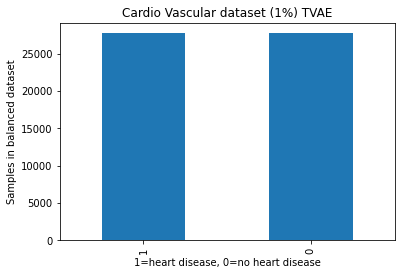

In [65]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (1%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [66]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [67]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60     27743
           1       0.61      0.66      0.63     27743

    accuracy                           0.62     55486
   macro avg       0.62      0.62      0.62     55486
weighted avg       0.62      0.62      0.62     55486



In [68]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.58      0.73      6936
           1       0.01      0.47      0.02        72

    accuracy                           0.58      7008
   macro avg       0.50      0.53      0.38      7008
weighted avg       0.98      0.58      0.72      7008



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.632


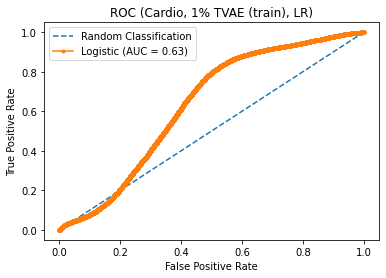

In [69]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.566


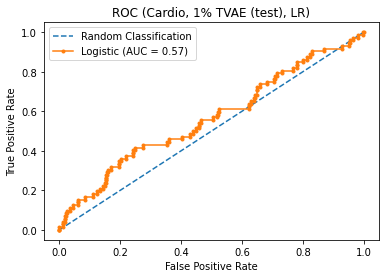

In [70]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with TVAE balanced data

In [71]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     27743
           1       0.98      0.95      0.97     27743

    accuracy                           0.97     55486
   macro avg       0.97      0.97      0.97     55486
weighted avg       0.97      0.97      0.97     55486



In [72]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6936
           1       0.01      0.01      0.01        72

    accuracy                           0.97      7008
   macro avg       0.50      0.50      0.50      7008
weighted avg       0.98      0.97      0.98      7008



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.991


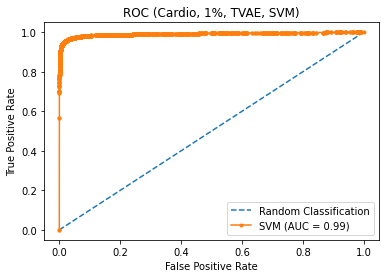

In [73]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.536


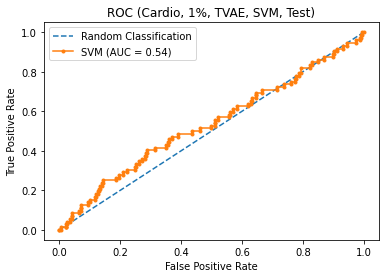

In [74]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [75]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.09280	validation_0-logloss:0.62322	validation_1-error:0.03225	validation_1-logloss:0.62374
[1]	validation_0-error:0.07193	validation_0-logloss:0.56553	validation_1-error:0.03225	validation_1-logloss:0.56614
[2]	validation_0-error:0.06780	validation_0-logloss:0.51517	validation_1-error:0.04837	validation_1-logloss:0.51612
[3]	validation_0-error:0.06802	validation_0-logloss:0.47309	validation_1-error:0.03225	validation_1-logloss:0.47365
[4]	validation_0-error:0.06295	validation_0-logloss:0.43684	validation_1-error:0.03453	validation_1-logloss:0.43782
[5]	validation_0-error:0.06348	validation_0-logloss:0.40536	validation_1-error:0.04795	validation_1-logloss:0.40669
[6]	validation_0-error:0.06512	validation_0-logloss:0.37787	validation_1-error:0.04680	validation_1-logloss:0.37862
[7]	validation_0-error:0.06274	validation_0-logloss:0.35444	validation_1-error:0.03396	validation_1-logloss:0.35475
[8]	validation_0-error:0.06295	validation_0-logloss:0.33266	validation_1

[71]	validation_0-error:0.01710	validation_0-logloss:0.06436	validation_1-error:0.01427	validation_1-logloss:0.08281
[72]	validation_0-error:0.01710	validation_0-logloss:0.06413	validation_1-error:0.01427	validation_1-logloss:0.08261
[73]	validation_0-error:0.01687	validation_0-logloss:0.06364	validation_1-error:0.01427	validation_1-logloss:0.08231
[74]	validation_0-error:0.01674	validation_0-logloss:0.06306	validation_1-error:0.01441	validation_1-logloss:0.08185
[75]	validation_0-error:0.01671	validation_0-logloss:0.06270	validation_1-error:0.01427	validation_1-logloss:0.08175
[76]	validation_0-error:0.01669	validation_0-logloss:0.06225	validation_1-error:0.01456	validation_1-logloss:0.08140
[77]	validation_0-error:0.01649	validation_0-logloss:0.06178	validation_1-error:0.01441	validation_1-logloss:0.08111
[78]	validation_0-error:0.01618	validation_0-logloss:0.06087	validation_1-error:0.01456	validation_1-logloss:0.08050
[79]	validation_0-error:0.01609	validation_0-logloss:0.06052	val

[141]	validation_0-error:0.01098	validation_0-logloss:0.04392	validation_1-error:0.01498	validation_1-logloss:0.07133
[142]	validation_0-error:0.01098	validation_0-logloss:0.04385	validation_1-error:0.01513	validation_1-logloss:0.07124
[143]	validation_0-error:0.01099	validation_0-logloss:0.04367	validation_1-error:0.01513	validation_1-logloss:0.07114
[144]	validation_0-error:0.01089	validation_0-logloss:0.04343	validation_1-error:0.01498	validation_1-logloss:0.07089
[145]	validation_0-error:0.01083	validation_0-logloss:0.04329	validation_1-error:0.01498	validation_1-logloss:0.07084
[146]	validation_0-error:0.01076	validation_0-logloss:0.04306	validation_1-error:0.01484	validation_1-logloss:0.07085
[147]	validation_0-error:0.01074	validation_0-logloss:0.04295	validation_1-error:0.01484	validation_1-logloss:0.07087
[148]	validation_0-error:0.01070	validation_0-logloss:0.04292	validation_1-error:0.01484	validation_1-logloss:0.07083
[149]	validation_0-error:0.01070	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     27743
           1       1.00      0.98      0.99     27743

    accuracy                           0.99     55486
   macro avg       0.99      0.99      0.99     55486
weighted avg       0.99      0.99      0.99     55486



In [77]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6936
           1       0.00      0.00      0.00        72

    accuracy                           0.99      7008
   macro avg       0.49      0.50      0.50      7008
weighted avg       0.98      0.99      0.98      7008



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.998


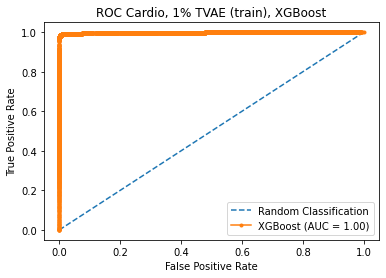

In [78]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.692


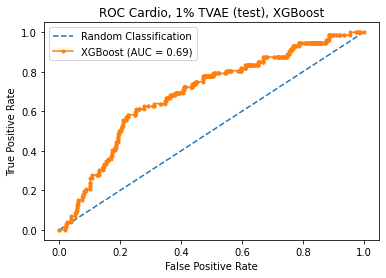

In [79]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [80]:
ctgan_df_1 = df_train[df_train['cardio'] == 1]
ctgan_df_0 = df_train[df_train['cardio'] == 0]
ctgan_0_sm = ctgan_df_0.sample(n = 500)
train_df_sm = ctgan_0_sm.append(ctgan_df_1)
train_df_sm['cardio'].value_counts()

0    500
1    288
Name: cardio, dtype: int64

In [81]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(500)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    187
Name: cardio, dtype: int64

In [82]:
train_df_sm1 = train_df_sm.append(samples)
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(1000)
samples = samples[samples['cardio'] ==1.0]
train_df_sm2 = train_df_sm1.append(samples)

In [83]:
train_df_sm2['cardio'].value_counts()

1    975
0    500
Name: cardio, dtype: int64

In [84]:
ctgan_0_sm1 = ctgan_df_0.sample(n = 2000)
ctgan_df_1_1 = train_df_sm2[train_df_sm2['cardio'] == 1]
ctgan_df_sm2 = ctgan_0_sm1.append(ctgan_df_1_1)
ctgan_df_sm2['cardio'].value_counts()

0    2000
1     975
Name: cardio, dtype: int64

In [85]:
ctgan = CTGANSynthesizer()

ctgan.fit(ctgan_df_sm2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(1500)
samples = samples[samples['cardio'] ==1.0]
train_df_sm3 = ctgan_df_sm2.append(samples)
train_df_sm3['cardio'].value_counts()

0    2000
1    1511
Name: cardio, dtype: int64

In [86]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm3, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2000)
samples = samples[samples['cardio'] ==1.0]
train_df_sm4 = train_df_sm3.append(samples)
train_df_sm4['cardio'].value_counts()

1    2718
0    2000
Name: cardio, dtype: int64

In [87]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm4, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2200)
samples = samples[samples['cardio'] ==1.0]
train_df_sm5 = train_df_sm4.append(samples)
train_df_sm5['cardio'].value_counts()

1    4233
0    2000
Name: cardio, dtype: int64

In [88]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm5, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2500)
samples = samples[samples['cardio'] ==1.0]
train_df_sm6 = train_df_sm5.append(samples)
train_df_sm6['cardio'].value_counts()

1    6127
0    2000
Name: cardio, dtype: int64

In [89]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm6, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(3000)
samples = samples[samples['cardio'] ==1.0]
train_df_sm7 = train_df_sm6.append(samples)
train_df_sm7['cardio'].value_counts()

1    8678
0    2000
Name: cardio, dtype: int64

In [90]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm7, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(3200)
samples = samples[samples['cardio'] ==1.0]
train_df_sm8 = train_df_sm7.append(samples)
train_df_sm8['cardio'].value_counts()

1    11471
0     2000
Name: cardio, dtype: int64

In [91]:
ctgan_0_med = ctgan_df_0.sample(n = 13000)
ctgan_df_1_med = train_df_sm8[train_df_sm8['cardio'] == 1]
ctgan_df_med = ctgan_df_1_med.append(ctgan_0_med)
ctgan_df_med['cardio'].value_counts()

0    13000
1    11471
Name: cardio, dtype: int64

In [92]:
ctgan = CTGANSynthesizer()

ctgan.fit(ctgan_df_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(10000)
samples = samples[samples['cardio'] ==1.0]
train_df_med1 = ctgan_df_med.append(samples)
train_df_med1['cardio'].value_counts()

1    17969
0    13000
Name: cardio, dtype: int64

In [93]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_med1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(12000)
samples = samples[samples['cardio'] ==1.0]
train_df_med2 = train_df_med1.append(samples)
train_df_med2['cardio'].value_counts()

1    25694
0    13000
Name: cardio, dtype: int64

In [94]:
ctgan_0_lg = ctgan_df_0.sample(n = 20000)
ctgan_df_1_lg = train_df_med2[train_df_med2['cardio'] == 1]
ctgan_df_lg = ctgan_df_1_lg.append(ctgan_0_lg)
ctgan_df_lg['cardio'].value_counts()

1    25694
0    20000
Name: cardio, dtype: int64

In [95]:
ctgan = CTGANSynthesizer()

ctgan.fit(ctgan_df_lg, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(21000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg1 = ctgan_df_lg.append(samples)
train_df_lg1['cardio'].value_counts()

1    37443
0    20000
Name: cardio, dtype: int64

In [96]:
ctgan_df_1 = train_df_lg1[train_df_lg1['cardio'] == 1]
train_df_1_bal = ctgan_df_1.sample(n = 27743)

In [97]:
ctgan_df_0 = df_train[df_train['cardio'] == 0]
df_train_bal = train_df_1_bal.append(ctgan_df_0)

In [98]:
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [99]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

### Logistic Regression with CTGAN data

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67     27743
           1       0.67      0.62      0.64     27743

    accuracy                           0.66     55486
   macro avg       0.66      0.66      0.65     55486
weighted avg       0.66      0.66      0.65     55486



In [101]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.69      0.82      6936
           1       0.01      0.40      0.03        72

    accuracy                           0.69      7008
   macro avg       0.50      0.55      0.42      7008
weighted avg       0.98      0.69      0.81      7008



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.700


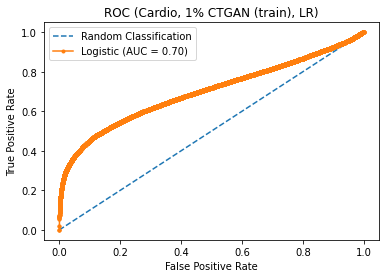

In [102]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.546


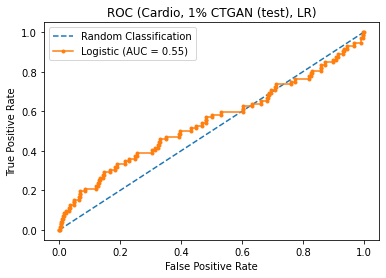

In [103]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

### SVM with CTGAN data

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83     27743
           1       0.87      0.75      0.81     27743

    accuracy                           0.82     55486
   macro avg       0.83      0.82      0.82     55486
weighted avg       0.83      0.82      0.82     55486



In [105]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      6936
           1       0.02      0.26      0.04        72

    accuracy                           0.88      7008
   macro avg       0.51      0.57      0.49      7008
weighted avg       0.98      0.88      0.93      7008



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.893


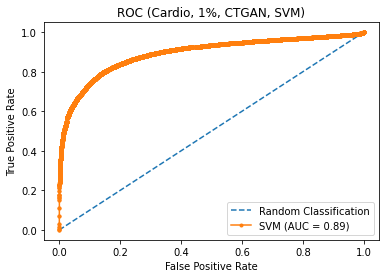

In [106]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.653


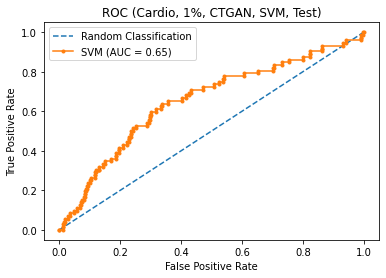

In [107]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 1%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### XGBoost with CTGAN data

In [108]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [109]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.12681	validation_0-logloss:0.63359	validation_1-error:0.16267	validation_1-logloss:0.63437
[1]	validation_0-error:0.12679	validation_0-logloss:0.58474	validation_1-error:0.16267	validation_1-logloss:0.58607
[2]	validation_0-error:0.12335	validation_0-logloss:0.54954	validation_1-error:0.15454	validation_1-logloss:0.55168
[3]	validation_0-error:0.12335	validation_0-logloss:0.51384	validation_1-error:0.15454	validation_1-logloss:0.51629
[4]	validation_0-error:0.12333	validation_0-logloss:0.48670	validation_1-error:0.15411	validation_1-logloss:0.49006
[5]	validation_0-error:0.11012	validation_0-logloss:0.45695	validation_1-error:0.12885	validation_1-logloss:0.46124
[6]	validation_0-error:0.10967	validation_0-logloss:0.43891	validation_1-error:0.12885	validation_1-logloss:0.44344
[7]	validation_0-error:0.08638	validation_0-logloss:0.42267	validation_1-error:0.08847	validation_1-logloss:0.42699
[8]	validation_0-error:0.09215	validation_0-logloss:0.39720	validation_1

[71]	validation_0-error:0.03950	validation_0-logloss:0.14323	validation_1-error:0.04495	validation_1-logloss:0.16112
[72]	validation_0-error:0.03947	validation_0-logloss:0.14275	validation_1-error:0.04495	validation_1-logloss:0.16067
[73]	validation_0-error:0.03922	validation_0-logloss:0.14173	validation_1-error:0.04509	validation_1-logloss:0.15978
[74]	validation_0-error:0.03918	validation_0-logloss:0.14133	validation_1-error:0.04495	validation_1-logloss:0.15943
[75]	validation_0-error:0.03916	validation_0-logloss:0.14102	validation_1-error:0.04481	validation_1-logloss:0.15917
[76]	validation_0-error:0.03895	validation_0-logloss:0.13966	validation_1-error:0.04438	validation_1-logloss:0.15813
[77]	validation_0-error:0.03832	validation_0-logloss:0.13825	validation_1-error:0.04423	validation_1-logloss:0.15699
[78]	validation_0-error:0.03803	validation_0-logloss:0.13727	validation_1-error:0.04324	validation_1-logloss:0.15606
[79]	validation_0-error:0.03796	validation_0-logloss:0.13539	val

[141]	validation_0-error:0.02972	validation_0-logloss:0.10301	validation_1-error:0.03824	validation_1-logloss:0.13094
[142]	validation_0-error:0.02963	validation_0-logloss:0.10279	validation_1-error:0.03839	validation_1-logloss:0.13073
[143]	validation_0-error:0.02965	validation_0-logloss:0.10264	validation_1-error:0.03839	validation_1-logloss:0.13065
[144]	validation_0-error:0.02961	validation_0-logloss:0.10257	validation_1-error:0.03839	validation_1-logloss:0.13056
[145]	validation_0-error:0.02945	validation_0-logloss:0.10223	validation_1-error:0.03824	validation_1-logloss:0.13038
[146]	validation_0-error:0.02927	validation_0-logloss:0.10157	validation_1-error:0.03824	validation_1-logloss:0.12991
[147]	validation_0-error:0.02927	validation_0-logloss:0.10131	validation_1-error:0.03824	validation_1-logloss:0.12974
[148]	validation_0-error:0.02893	validation_0-logloss:0.10080	validation_1-error:0.03781	validation_1-logloss:0.12940
[149]	validation_0-error:0.02889	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     27743
           1       0.98      0.97      0.97     27743

    accuracy                           0.97     55486
   macro avg       0.97      0.97      0.97     55486
weighted avg       0.97      0.97      0.97     55486



In [111]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6936
           1       0.02      0.04      0.02        72

    accuracy                           0.97      7008
   macro avg       0.50      0.51      0.50      7008
weighted avg       0.98      0.97      0.97      7008



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.994


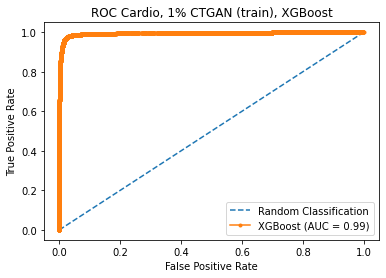

In [112]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.662


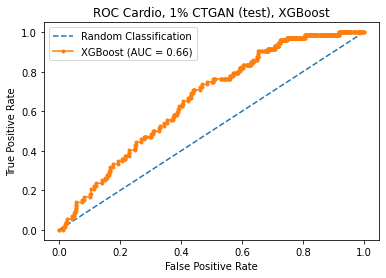

In [113]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 1% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()